In [1]:
from utils import *
root_path = os.getcwd()
print(root_path)

# folder to load config file
CONFIG_PATH = root_path
config = load_config(CONFIG_PATH, 'main_config.yaml')
#print('config: ', config)

C:\Users\mortega\AppData\Local\Continuum\anaconda3\envs\env2_tf1\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\mortega\AppData\Local\Continuum\anaconda3\envs\env2_tf1\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\mortega\AppData\Local\Continuum\anaconda3\envs\env2_tf1\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", n

Using TensorFlow backend.



F:\Doctorado\DomainAdaptation\Unsupervised Multi-target Domain Adaptation An information Theoretic Approach


In [2]:
# images name
print(config['name_img'])
if config['name_img'] == 'PA_1C':
    print('[***] Para')
    name = 'PA_1C'
    img_date_t0 = 'S2_PA_2020_07_15_'
    img_date_t1 = 'S2_PA_2021_07_25_08_04_'
    test_name = 'PA'
if config['name_img'] == 'RO_1C':
    print('[***] Rondonia')
    name = 'RO_1C'
    img_date_t0 = 'S2_RO_2020_07_29_08_01_'
    img_date_t1 = 'S2_RO_2021_07_19_22_'
    test_name = 'RO'
if config['name_img'] == 'MT_1C':
    print('[***] Mato Grosso')
    name = 'MT_1C'
    img_date_t0 = 'S2_MT_2020_08_02_'
    img_date_t1 = 'S2_MT_2021_07_23_'
    test_name = 'MT'
if config['name_img'] == 'MA_1C':
    print('[***] Maranhao')
    name = 'MA_1C'
    img_date_t0 = 'S2_MA_2020_08_02_10_'
    img_date_t1 = 'S2_MA_2021_08_20_'   
    test_name = 'MA'

PA_1C
[***] Para


In [3]:
# load images
if config['name_img'] == 'PA_1C':
    # T0
    img_t0a = load_optical_image(os.path.join(config['data_directory'], config['name_img'], config['t0'],
                                              img_date_t0 + 'B1_B2_B3.tif'))[:,:,1:].astype('float32')
    img_t0b = load_optical_image(os.path.join(config['data_directory'], config['name_img'], config['t0'],
                                              img_date_t0 + 'B4_B5_B6.tif')).astype('float32')
    img_t0c = load_optical_image(os.path.join(config['data_directory'], config['name_img'], config['t0'],
                                              img_date_t0 + 'B7_B8_B8A.tif')).astype('float32')    
    img_t0d = load_optical_image(os.path.join(config['data_directory'], config['name_img'], config['t0'],
                                              img_date_t0 + 'B9_B10_B11.tif'))[:,:,-1].astype('float32') 
    img_t0e = load_tif_image(os.path.join(config['data_directory'], config['name_img'], config['t0'],
                                              img_date_t0 + 'B12.tif')).astype('float32') 
    print('T0: ', img_t0a.shape, img_t0b.shape, img_t0c.shape, img_t0d.shape, img_t0e.shape)
    
    #T1
    img_t1a = load_optical_image(os.path.join(config['data_directory'], config['name_img'], config['t1'],
                                              img_date_t1 + 'B1_B2_B3.tif'))[:,:,1:].astype('float32')
    img_t1b = load_optical_image(os.path.join(config['data_directory'], config['name_img'], config['t1'],
                                              img_date_t1 + 'B4_B5_B6.tif')).astype('float32')
    img_t1c = load_optical_image(os.path.join(config['data_directory'], config['name_img'], config['t1'],
                                              img_date_t1 + 'B7_B8_B8A.tif')).astype('float32')
    img_t1d = load_optical_image(os.path.join(config['data_directory'], config['name_img'], config['t1'],
                                              img_date_t1 + 'B9_B10_B11.tif'))[:,:,-1].astype('float32')
    img_t1e = load_tif_image(os.path.join(config['data_directory'], config['name_img'], config['t1'],
                                              img_date_t1 + 'B12.tif')).astype('float32')
    print('T1: ', img_t1a.shape, img_t1b.shape, img_t1c.shape, img_t1d.shape, img_t1e.shape)
    
    img_t0 = np.concatenate((img_t0a, img_t0b, img_t0c, np.expand_dims(img_t0d, axis = -1),
                             np.expand_dims(img_t0e, axis = -1)), axis = -1)
    
    img_t1 = np.concatenate((img_t1a, img_t1b, img_t1c, np.expand_dims(img_t1d, axis = -1),
                             np.expand_dims(img_t1e, axis = -1)), axis = -1)
    
    del img_t0a, img_t0b, img_t0c, img_t0d, img_t0e, img_t1a, img_t1b, img_t1c, img_t1d, img_t1e
else:
    # T0
    img_t0a = load_optical_image(os.path.join(config['data_directory'], config['name_img'], config['t0'],
                                              img_date_t0 + 'B1_B2.tif'))[:,:,-1].astype('float32')
    img_t0b = load_optical_image(os.path.join(config['data_directory'], config['name_img'], config['t0'],
                                              img_date_t0 + 'B3_B4.tif')).astype('float32')
    img_t0c = load_optical_image(os.path.join(config['data_directory'], config['name_img'], config['t0'],
                                              img_date_t0 + 'B5_B6.tif')).astype('float32')
    img_t0d = load_optical_image(os.path.join(config['data_directory'], config['name_img'], config['t0'],
                                              img_date_t0 + 'B7_B8.tif')).astype('float32')
    img_t0e = load_optical_image(os.path.join(config['data_directory'], config['name_img'], config['t0'],
                                              img_date_t0 + 'B8A_B9.tif'))[:,:,0].astype('float32')
    img_t0f = load_optical_image(os.path.join(config['data_directory'], config['name_img'], config['t0'],
                                              img_date_t0 + 'B10_B11.tif'))[:,:,-1].astype('float32')
    img_t0g = load_tif_image(os.path.join(config['data_directory'], config['name_img'], config['t0'],
                                              img_date_t0 + 'B12.tif')).astype('float32')
    print('T0: ', img_t0a.shape, img_t0b.shape, img_t0c.shape, img_t0d.shape, img_t0e.shape, img_t0f.shape, img_t0g.shape)
    # T1
    img_t1a = load_optical_image(os.path.join(config['data_directory'], config['name_img'], config['t1'],
                                              img_date_t1 + 'B1_B2.tif'))[:,:,-1].astype('float32')
    img_t1b = load_optical_image(os.path.join(config['data_directory'], config['name_img'], config['t1'],
                                              img_date_t1 + 'B3_B4.tif')).astype('float32')
    img_t1c = load_optical_image(os.path.join(config['data_directory'], config['name_img'], config['t1'],
                                              img_date_t1 + 'B5_B6.tif')).astype('float32')
    img_t1d = load_optical_image(os.path.join(config['data_directory'], config['name_img'], config['t1'],
                                              img_date_t1 + 'B7_B8.tif')).astype('float32')
    img_t1e = load_optical_image(os.path.join(config['data_directory'], config['name_img'], config['t1'],
                                              img_date_t1 + 'B8A_B9.tif'))[:,:,0].astype('float32')
    img_t1f = load_optical_image(os.path.join(config['data_directory'], config['name_img'], config['t1'],
                                              img_date_t1 + 'B10_B11.tif'))[:,:,-1].astype('float32')
    img_t1g = load_tif_image(os.path.join(config['data_directory'], config['name_img'], config['t1'],
                                          img_date_t1 + 'B12.tif')).astype('float32')
    print('T1: ', img_t1a.shape, img_t1b.shape, img_t1c.shape, img_t1d.shape, img_t1e.shape, img_t1f.shape, img_t1g.shape)
    
    img_t0 = np.concatenate((np.expand_dims(img_t0a, axis = -1), img_t0b, img_t0c, img_t0d,
                             np.expand_dims(img_t0e, axis = -1), np.expand_dims(img_t0f, axis = -1),
                             np.expand_dims(img_t0g, axis = -1)), axis = -1)

    img_t1 = np.concatenate((np.expand_dims(img_t1a, axis = -1), img_t1b, img_t1c, img_t1d,
                             np.expand_dims(img_t1e, axis = -1), np.expand_dims(img_t1f, axis = -1),
                             np.expand_dims(img_t1g, axis = -1)), axis = -1)
    
    del img_t0a, img_t0b, img_t0c, img_t0d, img_t0e, img_t0f, img_t1a, img_t1b, img_t1c, img_t1d, img_t1e, img_t1f

print('image stack: ', img_t0.shape, img_t1.shape)

F:/Doctorado/DomainAdaptation/Data/PA_1C\2020\S2_PA_2020_07_15_B1_B2_B3.tif
Image shape : (17730, 9203, 3)
F:/Doctorado/DomainAdaptation/Data/PA_1C\2020\S2_PA_2020_07_15_B4_B5_B6.tif
Image shape : (17730, 9203, 3)
F:/Doctorado/DomainAdaptation/Data/PA_1C\2020\S2_PA_2020_07_15_B7_B8_B8A.tif
Image shape : (17730, 9203, 3)
F:/Doctorado/DomainAdaptation/Data/PA_1C\2020\S2_PA_2020_07_15_B9_B10_B11.tif
Image shape : (17730, 9203, 3)
F:/Doctorado/DomainAdaptation/Data/PA_1C\2020\S2_PA_2020_07_15_B12.tif
Image shape : (17730, 9203)
T0:  (17730, 9203, 2) (17730, 9203, 3) (17730, 9203, 3) (17730, 9203) (17730, 9203)
F:/Doctorado/DomainAdaptation/Data/PA_1C\2021\S2_PA_2021_07_25_08_04_B1_B2_B3.tif
Image shape : (17730, 9203, 3)
F:/Doctorado/DomainAdaptation/Data/PA_1C\2021\S2_PA_2021_07_25_08_04_B4_B5_B6.tif
Image shape : (17730, 9203, 3)
F:/Doctorado/DomainAdaptation/Data/PA_1C\2021\S2_PA_2021_07_25_08_04_B7_B8_B8A.tif
Image shape : (17730, 9203, 3)
F:/Doctorado/DomainAdaptation/Data/PA_1C\2021\

In [4]:
past_ref = np.load(os.path.join(config['data_directory'], config['name_img'], 'references' , 'past_def_accumulated_' + config['name_img'] + '.npy'))
final_mask = np.load(os.path.join(config['data_directory'], config['name_img'], config['name_img'] +'_ref_2020_2021.npy'))
print(config['name_img'] +'_ref_2020_2021.npy')
print(final_mask.shape, past_ref.shape)

PA_1C_ref_2020_2021.npy
(17730, 9203) (17730, 9203)


In [ ]:
#print(np.min(img_t1), np.max(img_t1))
#print(np.min(img_t0), np.max(img_t0))

In [5]:
from skimage.metrics import structural_similarity
#img_t0 = np.clip(img_t0, 0, 10000.0)
#img_t1 = np.clip(img_t1, 0, 10000.0)
m_ssim, full_ssim = structural_similarity(img_t1, img_t0, wind_size = 3, multichannel = True, full = True)
print(m_ssim, full_ssim.shape)

0.5974075781394059 (17730, 9203, 10)


In [6]:
average_ssim = 1- (np.mean(full_ssim, axis=-1))
print(average_ssim.shape)

(17730, 9203)


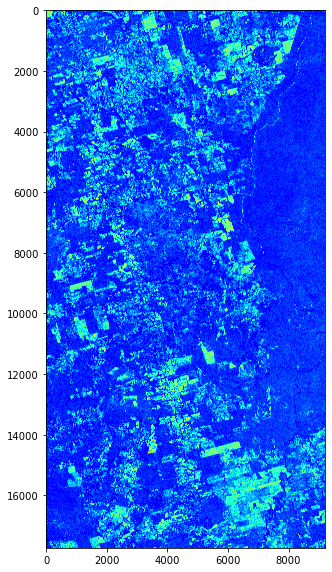

In [7]:
plt.figure(figsize=(5,10))
plt.imshow(average_ssim, cmap = 'jet')

mag norm:  (163169190,)
mag norm filt:  (95823039,)
Threshold-otsu ssim :  0.24433727182059617
(17730, 9203)


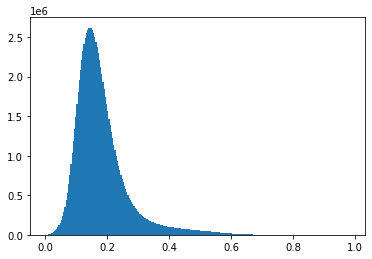

In [8]:
## Applying OTSU over normalized histograms
# Magnitude
average_ssim_norm = (average_ssim - np.min(average_ssim))/(np.max(average_ssim)- np.min(average_ssim))
average_ssim_norm_filt = average_ssim_norm[past_ref == 0]
print('mag norm: ', average_ssim_norm.ravel().shape)
print('mag norm filt: ', average_ssim_norm_filt.ravel().shape)
plt.hist(average_ssim_norm_filt.ravel(), bins=256)
thresh_mg = threshold_otsu(average_ssim_norm_filt)
print('Threshold-otsu ssim : ', thresh_mg)
#T = otsuthresh(h.Values);
## binarizing the magnitude
ssim_binary_map = average_ssim_norm > thresh_mg

print(ssim_binary_map.shape)

In [9]:
ssim_final_map = scipy.signal.medfilt2d(ssim_binary_map.astype(np.uint8), kernel_size=5)
# Removing area of PRODES 625 px
px_area = 625
filt_area = skimage.morphology.area_opening(ssim_final_map, area_threshold = px_area, connectivity=1)# Removing area of PRODES 625 px

# processed labels
final_prediction = ssim_final_map * filt_area * (past_ref == 0)*1
true_ref = np.zeros_like(final_mask)
true_ref[final_mask ==1] = 1

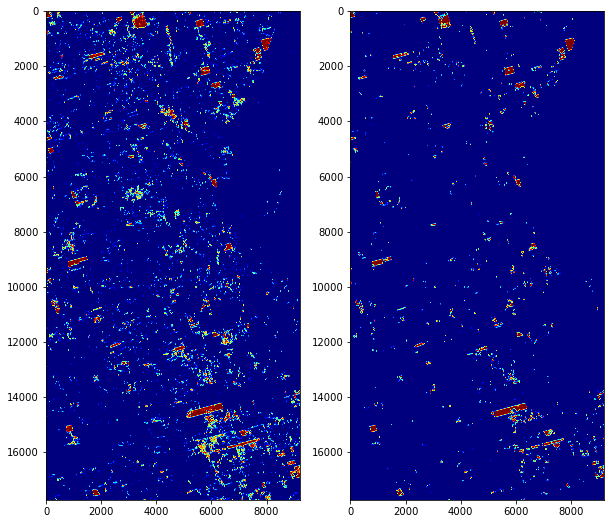

In [10]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(final_prediction, cmap = 'jet')
plt.subplot(1,2,2)
plt.imshow(true_ref, cmap = 'jet')

In [11]:
mask_test = np.load(os.path.join(config['data_directory'], config['name_img'],'test_mask_'+ test_name+ '.npy'))
print('test mask: ', 'test_mask_'+ test_name +'.npy')
final_mask = final_mask[:mask_test.shape[0], :mask_test.shape[1]]
print('clases: ', np.unique(true_ref))
prob_map = final_prediction[:mask_test.shape[0], :mask_test.shape[1]]
    
ProbList = [0.5]
    
metrics_05 = matrics_AA_recall(ProbList, prob_map, final_mask, mask_test, 625)
print('recall, precision, f1-score: ', metrics_05*100)

test mask:  test_mask_PA.npy
clases:  [0. 1.]
0.5
recall, precision, f1-score:  [[86.26118059 47.60089549 61.34836038]]


In [12]:
np.save(os.path.join(config['data_directory'], config['name_img'],'ssim_map_'+ config['name_img'] + '.npy'),prob_map)

[0 1 2]


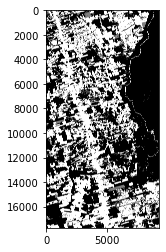

In [13]:
complete_ssim_map = prob_map.copy()
past_ref = past_ref[:mask_test.shape[0], :mask_test.shape[1]]
complete_ssim_map[past_ref == 1] = 2
print(np.unique(complete_ssim_map))
plt.imshow(complete_ssim_map, cmap = 'gray')

In [14]:
np.save(os.path.join(config['data_directory'], config['name_img'],'ssim_map_wp_'+ config['name_img']+ '.npy'), complete_ssim_map)